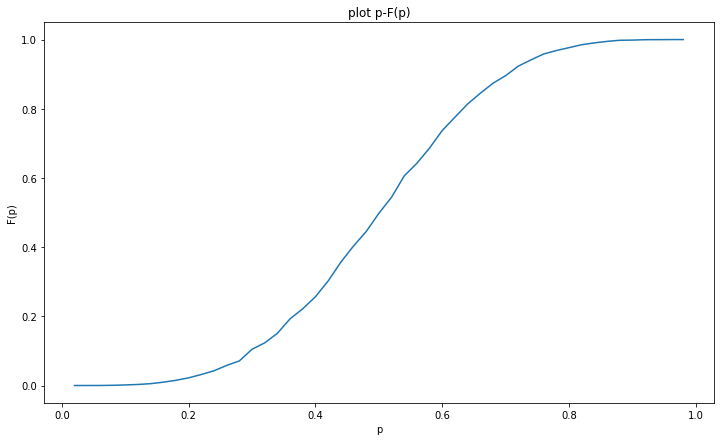

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from simple_markov_chain_lib import markov_chain

def winner(state):
        return (state == "GameA" or state == "GameB")
    
def F(p):
    q = 1-p
    init_probs = {"0-0": 1}
    N = 10000 #number of experiments

    markov_table = {
        "0-0": {"15-0": p, "0-15": q},
        "15-0": {"30-0": p, "15-15": q},
        "0-15": {"15-15": p, "0-30": q},
        "30-0": {"40-0": p, "30-15": q},
        "15-15": {"30-15": p, "15-30": q},
        "0-30": {"15-30": p, "0-40": q},
        "40-0": {"GameA": p, "40-15": q},
        "30-15": {"40-15": p, "Deuce": q},
        "15-30": {"Deuce": p, "15-40": q},
        "0-40": {"15-40": p, "GameB": q},
        "40-15": {"GameA": p, "AdvA": q},
        "15-40": {"AdvB": p, "GameB": q},
        "AdvA": {"GameA": p, "Deuce": q},
        "AdvB": {"Deuce": p, "GameB": q},
        "Deuce": {"AdvA": p, "AdvB": q},
        "GameA": {"GameA": 1},
        "GameB": {"GameB": 1}
    }

    counter = 0
    mc = markov_chain(markov_table, init_probs)
    for _ in range(N):
        mc.start()
        state = ""
        while not(winner(state)):
            mc.move()
            state = mc.running_state
            if (state == "GameA"): #player A won
                counter += 1
       
    return counter/N

p = np.arange(0.02, 1, 0.02)

plt.figure(figsize=(12, 7))
plt.xlabel("p")
plt.ylabel("F(p)")
plt.title("plot p-F(p)")
plt.plot(p, np.array([F(i) for i in p]))

Όπως αναμέναμε, παρατηρούμε ότι όσο αυξάνεται η πιθανότητα p να κερδίσει τον πόντο ο παίκτης που σερβίρει, τόσο αυξάνεται και η πιθανότητα να κερδίσει το game.
Επίσης παρατηρούμε ότι:
*  για $p = 0$:
   ο παίκτης που σερβίρει δεν κερδίζει ποτέ. Δηλαδή, $F(0) = 0$.
*  για $0<p<1/2$:
   o παίκτης που σερβίρει κερδίζει λιγότερες από τις μισές φορές. Δηλαδή, $0<F(p)<1/2$.
*  για $p = 1/2$:
   ο παίκτης που σερβίρει κερδίζει τις μισές φορές. Δηλαδή, $F(1/2) = 1/2$.
*  για $1/2<p<1$:
   ο παίκτης που σερβίρει κερδίζει περισσότερες από τις μισές φορές. Δηλαδή, $1/2<F(p)<1$.
*  για $p = 1$:
   ο παίκτης που σερβίρει κερδίζει πάντα. Δηλαδή, $F(1) = 1$

Τα παραπάνω αποτελέσματα συμφωνούν με την διαίσθησή μας.

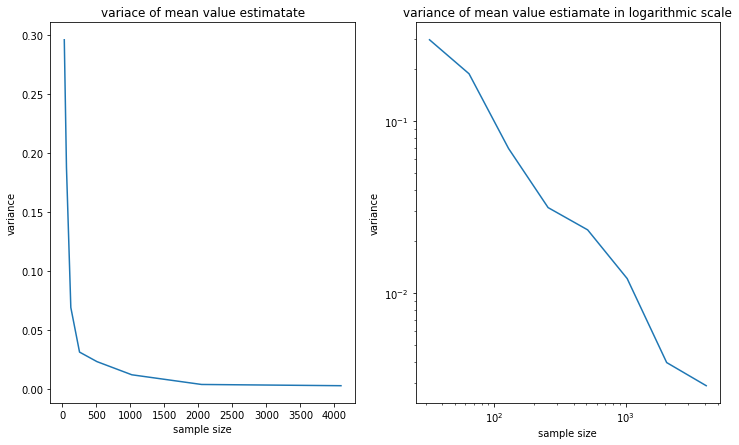

In [7]:
# Transition Table
markov_table = {
    0: {1: .5, 2: .5},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 3: .25, 4: .25},
    4: {4: 1.}
}

# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1

mc = markov_chain(markov_table, init_dist)

def simulate(i):
    M = 30
    sample_size = 2 ** i  # Ν
    estimates = []
    for _ in range(M):
        running_total = 0

        for i in range(sample_size):
            mc.start()
            while mc.running_state != 2 and mc.running_state != 4:
                mc.move()
            running_total += mc.steps  # steps it took to be absorbed

        estimates.append(running_total / sample_size)
    return stat.variance(estimates)

exponents = np.arange(5, 13, 1)
sample_sizes = [2 ** i for i in exponents]
variances = [simulate(i) for i in exponents]

plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
plt.xlabel("sample size")
plt.ylabel("variance")
plt.title("variace of mean value estimatate")
plt.plot(sample_sizes, variances)

plt.subplot(1,2,2)
plt.xlabel("sample size")
plt.ylabel("variance")
plt.title("variance of mean value estiamate in logarithmic scale")
plt.loglog(sample_sizes, variances)


In [8]:
coefs = np.polyfit(np.log2(sample_sizes), np.log2(variances), 1)
print("Slope of the line:", coefs[0])

Slope of the line: -0.9825148575343797


H (biased = μη αμερόληπτη) εκτίμηση της διακύμανσης μίας τυχαίας μεταβλητής $Χ$ είναι:  
$\hat{V}_N(X) = \frac{1}{N}\sum_{i}{(X^2_{i} - \hat{X}})$  
  
Την εκτίμηση αυτή υπολογίζει η συνάρτηση stat.variance() που χρησιμοποιήσαμε στο πρόγραμμα.  
Παίρνοντας λογάριθμο έχουμε:  
$log(\hat{V}_N(X)) = \sum_{i}{(X^2_{i} - \hat{X}}) - log(N)$  

H παραπάνω σχέση είναι γραμμική ως προς $log(N)$ οπώς παρατηρούμε στο σχήμα που προέκυψε από την προσομοίωση.
Επίσης, η κλίση της ευθείας που σχηματίζεται είναι $λ = -1$, η οποία είναι πολύ κοντά στην προσέγγιση που κάναμε.

